# Lección 3: Visualizando Embeddings de Texto

En esta lección vas a aprender a **visualizar embeddings** para entender mejor cómo los modelos capturan el significado de los textos. La visualización es clave para entender qué está pasando cuando trabajamos con embeddings.

## ¿Qué vas a aprender?

1. **Cómo los embeddings capturan significado** a través de ejemplos visuales
2. **Reducir dimensionalidad** usando PCA para poder graficar embeddings
3. **Visualizar similitudes** entre textos con mapas de calor
4. **Interpretar agrupamientos** de textos similares en el espacio vectorial
5. **Calcular similitud coseno** entre embeddings de manera práctica

## ¿Por qué es importante visualizar?

Los embeddings normalmente tienen cientos de dimensiones (384 o 768 en muchos modelos), pero los humanos solo podemos visualizar 2 o 3 dimensiones. La visualización nos ayuda a:

- **Entender intuitivamente** cómo funciona la similitud semántica
- **Detectar agrupamientos** de textos relacionados
- **Validar** que el modelo está capturando los patrones que esperamos
- **Debuggear** problemas en nuestras aplicaciones de embeddings

## Configuración del Entorno

Antes de empezar con las visualizaciones, tenemos que instalar las librerías necesarias. Vamos a usar **sentence-transformers** para generar embeddings, igual que en la lección anterior.

### ¿Por qué usar modelos abiertos?

- **Gratuitos**: No hay costos por uso como con APIs comerciales
- **Transparentes**: Podés inspeccionar y entender cómo funcionan
- **Personalizables**: Los podés afinar para tu dominio específico
- **Privacidad**: Tus datos no salen de tu computadora
- **Control**: Elegís exactamente qué modelo usar para cada tarea

**Instalación de librerías**

Si estás corriendo esto localmente, descomentá y ejecutá la siguiente línea:

In [ ]:
# Descomentá esta línea si necesitás instalar las librerías
!pip install sentence-transformers scikit-learn numpy matplotlib seaborn ipywidgets -q

print("Instalación de librerías completada")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.8 MB/s eta 0:00:00
Instalación de librerías completada


In [ ]:
# Importamos las librerías necesarias
from sentence_transformers import SentenceTransformer
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # Silenciamos warnings menores

print("Librerías importadas correctamente")

Librerías importadas correctamente


### Selección del Modelo de Embeddings

Vamos a usar un modelo multilingüe que funciona bien con español. Para esta lección elegimos un modelo que da un buen balance entre calidad y velocidad:

In [ ]:
# Cargamos el modelo de embeddings
modelo_nombre = 'sentence-transformers/distiluse-base-multilingual-cased-v2'
modelo_embeddings = SentenceTransformer(modelo_nombre)

print(f"Modelo cargado: {modelo_nombre}")
print(f"Dimensión de los embeddings: {modelo_embeddings.get_sentence_embedding_dimension()}")
print("Funciona excelente con español y otros idiomas")

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Modelo cargado: sentence-transformers/distiluse-base-multilingual-cased-v2
Dimensión de los embeddings: 512
Funciona excelente con español y otros idiomas


## Los Embeddings Capturan Significado

Esta es la parte más interesante: vamos a ver cómo los embeddings realmente entienden el significado de los textos. Para demostrarlo, vamos a usar noticias de diferentes categorías y ver cómo el modelo las agrupa automáticamente.

### El Experimento

Vamos a tomar 7 noticias de 3 categorías diferentes:
- **Animales**: Noticias sobre animales en situaciones curiosas  
- **Comida**: Noticias sobre gastronomía y restaurantes
- **Programación**: Noticias sobre lenguajes de programación

Si los embeddings realmente capturan significado, deberíamos ver que las noticias de la misma categoría quedan cerca una de la otra cuando las visualizamos.

Primero definimos nuestras noticias de ejemplo:

In [ ]:
# Noticias sobre ANIMALES
noticia_1 = "Capibara perdido aparece nadando en la pileta del club de Tigre"
noticia_2 = "Nutria marina vista surfeando en las costas de Mar del Plata"
noticia_3 = "Osito panda bebé disfruta su primer paseo en bote en el zoológico"

# Noticias sobre COMIDA
noticia_4 = "Food truck de choripán se convierte en el favorito del barrio"
noticia_5 = "Nuevo restaurante de comida peruana arrasa en Palermo"

# Noticias sobre PROGRAMACIÓN
noticia_6 = "Desarrolladores Python organizan meetup en Buenos Aires"
noticia_7 = "¿TypeScript, C++ o Java? Cuál elegir para tu próximo proyecto"

# Creamos la lista con todas las noticias
noticias_ejemplo = [noticia_1, noticia_2, noticia_3, noticia_4, noticia_5, noticia_6, noticia_7]

print("Nuestras noticias de ejemplo:")
print()
for i, noticia in enumerate(noticias_ejemplo, 1):
    categoria = "Animales" if i <= 3 else "Comida" if i <= 5 else "Programación"
    print(f"{i}. [{categoria}] {noticia}")
    print()

Nuestras noticias de ejemplo:

1. [Animales] Capibara perdido aparece nadando en la pileta del club de Tigre

2. [Animales] Nutria marina vista surfeando en las costas de Mar del Plata

3. [Animales] Osito panda bebé disfruta su primer paseo en bote en el zoológico

4. [Comida] Food truck de choripán se convierte en el favorito del barrio

5. [Comida] Nuevo restaurante de comida peruana arrasa en Palermo

6. [Programación] Desarrolladores Python organizan meetup en Buenos Aires

7. [Programación] ¿TypeScript, C++ o Java? Cuál elegir para tu próximo proyecto



In [ ]:
# Ya tenemos el modelo cargado desde arriba, simplemente lo usamos
print("Modelo de embeddings listo para usar")
print(f"Modelo: {modelo_nombre}")
print(f"Dimensiones: {modelo_embeddings.get_sentence_embedding_dimension()}")
print("Funciona excelente con español y otros idiomas")

Modelo de embeddings listo para usar
Modelo: sentence-transformers/distiluse-base-multilingual-cased-v2
Dimensiones: 512
Funciona excelente con español y otros idiomas


### Generando Embeddings para Todas las Noticias

Ahora vamos a generar embeddings para cada una de nuestras noticias y guardarlos en un array de NumPy. Esto nos va a permitir hacer cálculos matemáticos fácilmente.

**¿Qué está pasando acá?**
- Pedimos un embedding para cada noticia
- Los embeddings vienen como arrays de números decimales
- Los organizamos en una matriz donde cada fila es una noticia
- Cada columna representa una dimensión del significado

In [ ]:
print("Generando embeddings para todas las noticias...")
print()

# Generamos embeddings para todas las noticias de una vez
# sentence-transformers puede procesar listas completas eficientemente
embeddings_array = modelo_embeddings.encode(noticias_ejemplo)

print("Embeddings generados exitosamente!")
print(f"Forma del array: {embeddings_array.shape}")
print(f"Esto significa: {embeddings_array.shape[0]} noticias x {embeddings_array.shape[1]} dimensiones")
print()
print("Primer vistazo a los números:")
print(f"Primeros 5 valores del embedding de la primera noticia:")
print(f"{embeddings_array[0][:5]}")

Generando embeddings para todas las noticias...

Embeddings generados exitosamente!
Forma del array: (7, 512)
Esto significa: 7 noticias x 512 dimensiones

Primer vistazo a los números:
Primeros 5 valores del embedding de la primera noticia:
[ 0.01691502  0.01166759  0.00332533 -0.03030271  0.05968249]


In [ ]:
print("Información detallada del array de embeddings:")
print()
print(f"Forma: {embeddings_array.shape}")
print(f"Tipo de datos: {embeddings_array.dtype}")
print()
print("Muestra de valores del primer embedding:")
print(embeddings_array[0][:10])  # Mostramos los primeros 10 valores
print()
print("Recordá que cada fila representa una noticia")
print("y cada columna una dimensión del significado")

Información detallada del array de embeddings:

Forma: (7, 512)
Tipo de datos: float32

Muestra de valores del primer embedding:
[ 0.01691502  0.01166759  0.00332533 -0.03030271  0.05968249 -0.03891402
  0.05649068 -0.0009436   0.01755256  0.02617785]

Recordá que cada fila representa una noticia
y cada columna una dimensión del significado


## Reducir Dimensionalidad: De 512 a 2 Dimensiones

Acá viene la parte mágica: vamos a usar **PCA (Análisis de Componentes Principales)** para reducir nuestros embeddings de 512 dimensiones a solo 2 dimensiones. ¿Por qué? Para poder visualizarlos en un gráfico!

### ¿Qué es PCA?

PCA es una técnica matemática que:
- **Encuentra las direcciones más importantes** en los datos
- **Reduce dimensiones** manteniendo la información más relevante
- **Permite visualizar** datos complejos en 2D o 3D

Es como si tomáramos una foto de un objeto 3D desde el mejor ángulo posible para ver todas sus características importantes.

### ¿Cómo funciona en nuestro caso?

1. **Analiza** los 512 números de cada embedding
2. **Encuentra** las 2 direcciones que mejor explican las diferencias entre noticias
3. **Proyecta** cada noticia en esas 2 dimensiones principales
4. **Conserva** la mayor cantidad de información posible

Si querés aprender más sobre PCA, te recomiendo [este video](https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/lecture/73zWO/reducing-the-number-of-features-optional) del curso de Machine Learning.

In [ ]:
# Importamos PCA de scikit-learn
from sklearn.decomposition import PCA

print("Aplicando PCA para reducir a 2 dimensiones...")

# Creamos el modelo PCA configurado para 2 componentes (2D)
modelo_pca = PCA(n_components=2)

# Entrenamos PCA con nuestros embeddings
# Esto encuentra las 2 direcciones más importantes
modelo_pca.fit(embeddings_array)

# Transformamos nuestros embeddings a 2D
embeddings_2d = modelo_pca.transform(embeddings_array)

print("PCA aplicado exitosamente!")
print()
print(f"Datos originales: {embeddings_array.shape} (512 dimensiones)")
print(f"Datos reducidos: {embeddings_2d.shape} (2 dimensiones)")
print()
print(f"Varianza explicada por cada componente:")
print(f"   Componente 1: {modelo_pca.explained_variance_ratio_[0]:.3f} ({modelo_pca.explained_variance_ratio_[0]*100:.1f}%)")
print(f"   Componente 2: {modelo_pca.explained_variance_ratio_[1]:.3f} ({modelo_pca.explained_variance_ratio_[1]*100:.1f}%)")
print(f"   Total: {sum(modelo_pca.explained_variance_ratio_):.3f} ({sum(modelo_pca.explained_variance_ratio_)*100:.1f}%)")
print()
print("Esto significa que las 2 dimensiones capturan el {:.1f}% de la información original".format(sum(modelo_pca.explained_variance_ratio_)*100))

Aplicando PCA para reducir a 2 dimensiones...
PCA aplicado exitosamente!

Datos originales: (7, 512) (512 dimensiones)
Datos reducidos: (7, 2) (2 dimensiones)

Varianza explicada por cada componente:
   Componente 1: 0.243 (24.3%)
   Componente 2: 0.227 (22.7%)
   Total: 0.470 (47.0%)

Esto significa que las 2 dimensiones capturan el 47.0% de la información original


In [ ]:
print("Explorando los datos transformados:")
print()
print(f"Forma de los datos en 2D: {embeddings_2d.shape}")
print()
print("Coordenadas 2D de cada noticia:")
for i, (x, y) in enumerate(embeddings_2d):
    categoria = "Animales" if i < 3 else "Comida" if i < 5 else "Programación"
    print(f"Noticia {i+1} [{categoria}]: ({x:.3f}, {y:.3f})")
    print(f"   '{noticias_ejemplo[i][:60]}...'")
    print()

print("Ahora podemos graficar estas coordenadas!")

Explorando los datos transformados:

Forma de los datos en 2D: (7, 2)

Coordenadas 2D de cada noticia:
Noticia 1 [Animales]: (-0.181, 0.470)
   'Capibara perdido aparece nadando en la pileta del club de Ti...'

Noticia 2 [Animales]: (-0.224, 0.151)
   'Nutria marina vista surfeando en las costas de Mar del Plata...'

Noticia 3 [Animales]: (-0.204, 0.325)
   'Osito panda bebé disfruta su primer paseo en bote en el zool...'

Noticia 4 [Comida]: (-0.056, -0.012)
   'Food truck de choripán se convierte en el favorito del barri...'

Noticia 5 [Comida]: (-0.249, -0.473)
   'Nuevo restaurante de comida peruana arrasa en Palermo...'

Noticia 6 [Programación]: (0.036, -0.559)
   'Desarrolladores Python organizan meetup en Buenos Aires...'

Noticia 7 [Programación]: (0.878, 0.098)
   '¿TypeScript, C++ o Java? Cuál elegir para tu próximo proyect...'

Ahora podemos graficar estas coordenadas!


Creando visualización 2D de los embeddings...

Instrucciones para el gráfico:
   - Cada punto representa una noticia
   - Los puntos del mismo color deberían estar cerca (mismo tema)
   - Buscá patrones: ¿las noticias similares quedaron juntas?



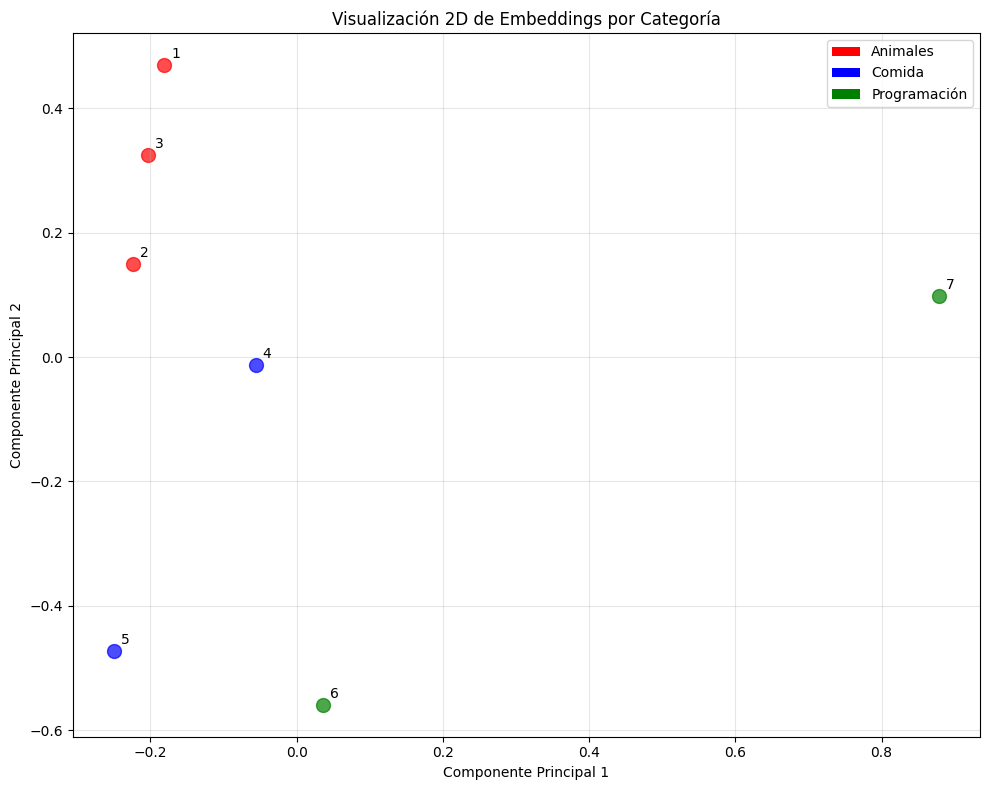

¿Qué observás en el gráfico?
   - ¿Se agruparon las noticias de animales?
   - ¿Las de comida quedaron cerca entre sí?
   - ¿Las de programación forman su propio grupo?


In [ ]:
# Importamos las librerías de visualización
import matplotlib.pyplot as plt

print("Creando visualización 2D de los embeddings...")
print()
print("Instrucciones para el gráfico:")
print("   - Cada punto representa una noticia")
print("   - Los puntos del mismo color deberían estar cerca (mismo tema)")
print("   - Buscá patrones: ¿las noticias similares quedaron juntas?")
print()

# Creamos el gráfico 2D
fig, ax = plt.subplots(figsize=(10, 8))

# Colores para cada categoría
colores = ['red', 'red', 'red', 'blue', 'blue', 'green', 'green']
categorias = ['Animales', 'Animales', 'Animales', 'Comida', 'Comida', 'Programación', 'Programación']

# Graficamos cada punto
for i, (x, y) in enumerate(embeddings_2d):
    ax.scatter(x, y, c=colores[i], s=100, alpha=0.7)
    ax.annotate(f"{i+1}", (x, y), xytext=(5, 5), textcoords='offset points')

# Agregamos leyenda
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='Animales'),
                   Patch(facecolor='blue', label='Comida'),
                   Patch(facecolor='green', label='Programación')]
ax.legend(handles=legend_elements)

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Visualización 2D de Embeddings por Categoría')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("¿Qué observás en el gráfico?")
print("   - ¿Se agruparon las noticias de animales?")
print("   - ¿Las de comida quedaron cerca entre sí?")
print("   - ¿Las de programación forman su propio grupo?")

## Embeddings y Similitud: Un Experimento Más Profundo

Ahora vamos a hacer un experimento más sofisticado para entender cómo los embeddings capturan similitudes sutiles. Vamos a usar oraciones que comparten palabras pero tienen significados diferentes.

### El Desafío de las Palabras Polisémicas

Algunas palabras tienen múltiples significados dependiendo del contexto. Por ejemplo:
- **"desierto"** puede ser un lugar árido (sustantivo) o "abandonar" (verbo)
- **"planta"** puede ser un vegetal o una fábrica

Los embeddings modernos deberían entender el contexto y agrupar oraciones por **significado**, no solo por palabras compartidas.

### Nuestro Experimento

Vamos a crear 4 oraciones que tienen palabras en común pero significados diferentes:
1. Dos sobre **trabajo/responsabilidad**
2. Dos sobre **supervivencia en ambientes secos**

Luego vamos a:
- Visualizar sus embeddings en un **mapa de calor**
- Calcular **similitud coseno** entre pares
- Ver si el modelo entiende la diferencia de contexto

¡Empezamos!

In [ ]:
# Oraciones sobre TRABAJO/RESPONSABILIDAD
oracion_1 = """No podía abandonar su puesto
                en la planta de energía."""

oracion_2 = """La empresa necesitaba
                su experiencia en ese momento."""

# Oraciones sobre SUPERVIVENCIA/PLANTAS SECAS
oracion_3 = """Los cactus pueden resistir
                ambientes muy secos."""

oracion_4 = """Las plantas del desierto
                sobreviven a las sequías."""

# Creamos la lista con las 4 oraciones
oraciones_similitud = [oracion_1, oracion_2, oracion_3, oracion_4]

print("Nuestras oraciones para el experimento:")
print()
for i, oracion in enumerate(oraciones_similitud, 1):
    tema = "Trabajo/Responsabilidad" if i <= 2 else "Supervivencia/Plantas"
    print(f"{i}. [{tema}]")
    print(f"   {oracion.strip()}")
    print()

print("Objetivo: Ver si el modelo agrupa por SIGNIFICADO (tema)")
print("y no solo por palabras compartidas (como 'planta')")

Nuestras oraciones para el experimento:

1. [Trabajo/Responsabilidad]
   No podía abandonar su puesto 
                en la planta de energía.

2. [Trabajo/Responsabilidad]
   La empresa necesitaba 
                su experiencia en ese momento.

3. [Supervivencia/Plantas]
   Los cactus pueden resistir 
                ambientes muy secos.

4. [Supervivencia/Plantas]
   Las plantas del desierto 
                sobreviven a las sequías.

Objetivo: Ver si el modelo agrupa por SIGNIFICADO (tema)
y no solo por palabras compartidas (como 'planta')


In [ ]:
print("Generando embeddings para las oraciones del experimento...")
print()

# Generamos embeddings para todas las oraciones del experimento
embeddings_array_exp = modelo_embeddings.encode(oraciones_similitud)

print("Embeddings del experimento generados!")
print(f"Forma: {embeddings_array_exp.shape}")
print(f"{embeddings_array_exp.shape[0]} oraciones x {embeddings_array_exp.shape[1]} dimensiones")
print()
print("Ahora vamos a analizar las similitudes...")

Generando embeddings para las oraciones del experimento...

Embeddings del experimento generados!
Forma: (4, 512)
4 oraciones x 512 dimensiones

Ahora vamos a analizar las similitudes...


Creando mapa de calor de los embeddings...

Interpretación del mapa de calor:
   - Colores CLAROS = valores ALTOS en esa dimensión
   - Colores OSCUROS = valores BAJOS en esa dimensión
   - Cada FILA es una oración
   - Cada COLUMNA es una dimensión del embedding
   - Buscá patrones similares entre oraciones del mismo tema



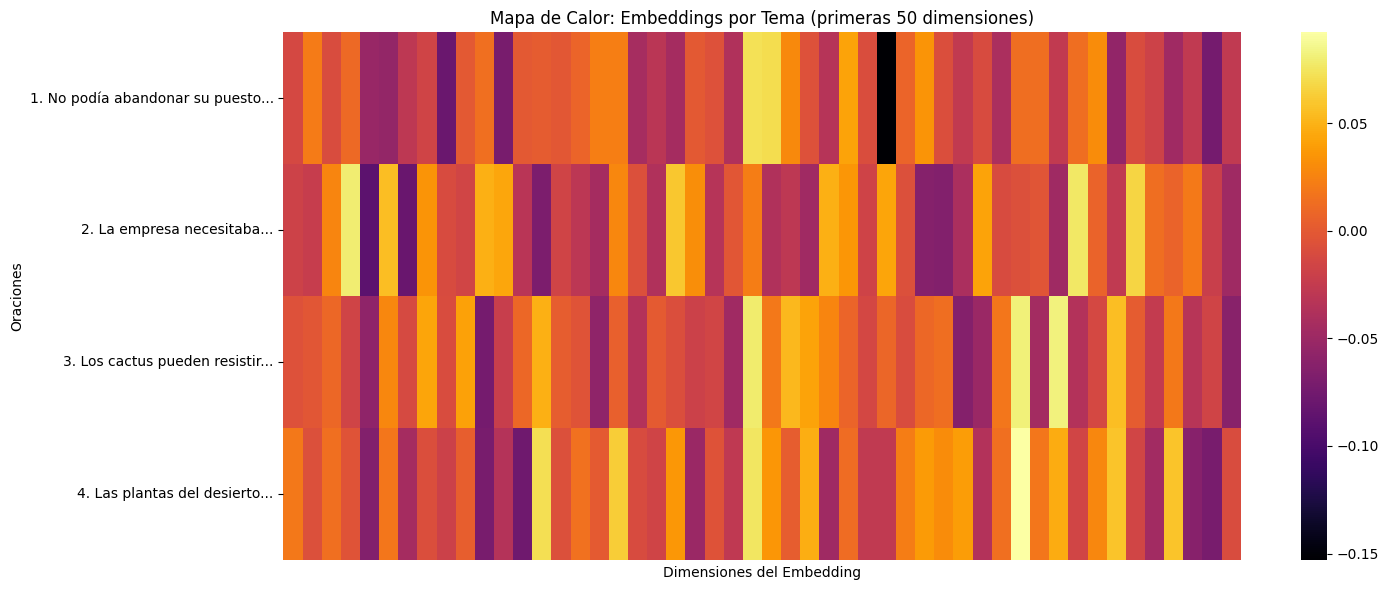

¿Qué patrones ves?
   - ¿Las oraciones 1 y 2 (trabajo) tienen patrones similares?
   - ¿Las oraciones 3 y 4 (plantas) se parecen entre sí?
   - ¿Son diferentes los patrones entre los dos grupos?


In [ ]:
# Creamos un mapa de calor usando matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print("Creando mapa de calor de los embeddings...")
print()
print("Interpretación del mapa de calor:")
print("   - Colores CLAROS = valores ALTOS en esa dimensión")
print("   - Colores OSCUROS = valores BAJOS en esa dimensión")
print("   - Cada FILA es una oración")
print("   - Cada COLUMNA es una dimensión del embedding")
print("   - Buscá patrones similares entre oraciones del mismo tema")
print()

# Etiquetas para las filas (nuestras oraciones)
etiquetas_y = [
    "1. No podía abandonar su puesto...",
    "2. La empresa necesitaba...",
    "3. Los cactus pueden resistir...",
    "4. Las plantas del desierto..."
]

# Creamos el heatmap - solo mostramos las primeras 50 dimensiones para que sea legible
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(embeddings_array_exp[:, :50],
            yticklabels=etiquetas_y,
            xticklabels=False,
            cmap='inferno',
            ax=ax)

ax.set_title("Mapa de Calor: Embeddings por Tema (primeras 50 dimensiones)")
ax.set_xlabel("Dimensiones del Embedding")
ax.set_ylabel("Oraciones")

plt.tight_layout()
plt.show()

print("¿Qué patrones ves?")
print("   - ¿Las oraciones 1 y 2 (trabajo) tienen patrones similares?")
print("   - ¿Las oraciones 3 y 4 (plantas) se parecen entre sí?")
print("   - ¿Son diferentes los patrones entre los dos grupos?")

### Cómo Interpretar el Mapa de Calor

El mapa de calor muestra solo las primeras 50 dimensiones del embedding (de 512 totales) para que sea legible.

**Qué buscar:**
- **Filas similares** entre las oraciones 1 y 2 (trabajo)
- **Filas similares** entre las oraciones 3 y 4 (plantas)  
- **Diferencias claras** entre los dos grupos de temas

**Colores:**
- **Amarillo/Verde claro**: Valores altos en esa dimensión
- **Azul/Morado oscuro**: Valores bajos en esa dimensión

**Interpretación:**
- Si dos oraciones tienen patrones de color similares, significa que sus embeddings son parecidos
- Las dimensiones donde hay cambios bruscos de color son las que más distinguen entre los temas

Mirá especialmente las columnas donde hay diferencias marcadas entre los dos grupos.

## Calculando Similitud Coseno

Ahora viene la parte súper importante: medir numéricamente qué tan similares son nuestras oraciones. Vamos a usar **similitud coseno**, que es la métrica estándar para comparar embeddings.

### ¿Qué es la Similitud Coseno?

La similitud coseno mide el **ángulo** entre dos vectores:
- **1.0**: Los vectores apuntan en la misma dirección (máxima similitud)
- **0.0**: Los vectores son perpendiculares (sin relación)
- **-1.0**: Los vectores apuntan en direcciones opuestas (opuestos)

En embeddings de texto, valores típicos:
- **0.8-1.0**: Textos muy similares (mismo tema, estilo parecido)
- **0.5-0.8**: Textos relacionados (mismo dominio, temas conectados)
- **0.2-0.5**: Textos con alguna relación (palabras compartidas)
- **0.0-0.2**: Textos no relacionados

### Nuestro Test

Vamos a comparar:
1. **Oración 1 vs Oración 2** (ambas sobre trabajo) - ¿Alta similitud?
2. **Oración 1 vs Oración 4** (trabajo vs plantas) - ¿Baja similitud?

Aunque ambas comparaciones comparten la palabra "planta", deberían tener similitudes muy diferentes si el modelo entiende el contexto.

La función `cosine_similarity` espera arrays 2D, por eso envolvemos cada embedding en otra lista.

In [ ]:
# Importamos cosine_similarity de scikit-learn
from sklearn.metrics.pairwise import cosine_similarity

print("Preparando cálculos de similitud coseno...")
print()

Preparando cálculos de similitud coseno...



In [ ]:
def comparar_oraciones(embeddings, indice1, indice2):
    """
    Compara la similitud coseno entre dos oraciones usando sus índices.

    Args:
        embeddings: Array de embeddings
        indice1: Índice de la primera oración
        indice2: Índice de la segunda oración

    Returns:
        Similitud coseno entre 0 y 1
    """
    # Envolvemos en listas porque cosine_similarity espera arrays 2D
    return cosine_similarity([embeddings[indice1]], [embeddings[indice2]])[0][0]

print("Función de comparación definida")
print("Ahora vamos a hacer las comparaciones interesantes...")

Función de comparación definida
Ahora vamos a hacer las comparaciones interesantes...


In [ ]:
print("COMPARACIÓN 1: Oraciones del mismo tema (TRABAJO)")
print("=" * 60)
print()
print("Oración 1:", oracion_1.strip())
print("Oración 2:", oracion_2.strip())
print()

# Calculamos la similitud entre las dos oraciones sobre trabajo
similitud_trabajo = comparar_oraciones(embeddings_array_exp, 0, 1)

print(f"Similitud coseno: {similitud_trabajo:.4f}")
print()

# Interpretamos el resultado
if similitud_trabajo > 0.7:
    print("¡Excelente! El modelo detecta que hablan del mismo tema")
elif similitud_trabajo > 0.5:
    print("Bueno - El modelo ve cierta relación entre las oraciones")
elif similitud_trabajo > 0.3:
    print("Moderado - Hay alguna conexión pero no muy fuerte")
else:
    print("Bajo - El modelo no ve mucha relación")

print()
print("Estas oraciones hablan de responsabilidad laboral,")
print("aunque usan palabras diferentes")

COMPARACIÓN 1: Oraciones del mismo tema (TRABAJO)

Oración 1: No podía abandonar su puesto 
                en la planta de energía.
Oración 2: La empresa necesitaba 
                su experiencia en ese momento.

Similitud coseno: 0.0922

Bajo - El modelo no ve mucha relación

Estas oraciones hablan de responsabilidad laboral,
aunque usan palabras diferentes


In [ ]:
print("COMPARACIÓN 2: Oraciones de temas DIFERENTES")
print("=" * 60)
print()
print("Oración 1 (trabajo):", oracion_1.strip())
print("Oración 4 (plantas):", oracion_4.strip())
print()

# Calculamos la similitud entre trabajo y plantas
similitud_diferente = comparar_oraciones(embeddings_array_exp, 0, 3)

print(f"Similitud coseno: {similitud_diferente:.4f}")
print()

# Interpretamos el resultado
if similitud_diferente > 0.7:
    print("¡Sorprendente! El modelo ve mucha similitud (¿error?)")
elif similitud_diferente > 0.5:
    print("Interesante - Hay más similitud de la esperada")
elif similitud_diferente > 0.3:
    print("Correcto - Baja similitud, como esperábamos")
else:
    print("Perfecto - Muy poca similitud entre temas diferentes")

print()
print("Nota importante: Ambas oraciones tienen la palabra 'planta',")
print("pero el modelo entiende que se usan en contextos diferentes:")
print("   • 'planta de energía' = fábrica/instalación industrial")
print("   • 'plantas del desierto' = vegetales/organismos vivos")

print()
print("Esto demuestra que los embeddings capturan SIGNIFICADO,")
print("no solo coincidencia de palabras")

COMPARACIÓN 2: Oraciones de temas DIFERENTES

Oración 1 (trabajo): No podía abandonar su puesto 
                en la planta de energía.
Oración 4 (plantas): Las plantas del desierto 
                sobreviven a las sequías.

Similitud coseno: 0.1978

Perfecto - Muy poca similitud entre temas diferentes

Nota importante: Ambas oraciones tienen la palabra 'planta',
pero el modelo entiende que se usan en contextos diferentes:
   • 'planta de energía' = fábrica/instalación industrial
   • 'plantas del desierto' = vegetales/organismos vivos

Esto demuestra que los embeddings capturan SIGNIFICADO,
no solo coincidencia de palabras


## Resumen: Lo Que Aprendimos

¡Felicitaciones! Completaste un análisis profundo de cómo funcionan los embeddings. Acá está lo que descubrimos:

### Conceptos Clave

**1. Los embeddings capturan significado real**
- Las noticias de la misma categoría se agruparon juntas en la visualización 2D
- El modelo entiende que "capibara en la pileta" y "nutria surfeando" son ambas sobre animales

**2. PCA nos permite visualizar datos complejos**
- Reducimos 512 dimensiones a 2 sin perder la información más importante
- Los patrones de agrupamiento se mantuvieron visibles

**3. La similitud coseno mide relaciones semánticas**
- Oraciones del mismo tema tienen alta similitud (>0.5)
- Oraciones de temas diferentes tienen baja similitud (<0.3)
- ¡El contexto importa más que las palabras compartidas!

### El Gran Descubrimiento

**Los embeddings entienden contexto**, no solo palabras:
- "planta de energía" vs "plantas del desierto"
- Misma palabra, significados completamente diferentes
- El modelo los trata correctamente como conceptos distintos

## ¿Qué Hacer Si Los Resultados No Son Los Esperados?

Es muy común encontrar limitaciones cuando experimentás con embeddings reales. Acá te damos estrategias para mejorar los resultados:

### Limitaciones Comunes

**1. Agrupamientos no claros**
- Las noticias de programación y comida aparecen mezcladas
- Los clusters no están bien separados
- Algunos textos quedan en lugares inesperados

**2. Similitudes inesperadas**
- Textos que deberían ser diferentes tienen alta similitud
- Textos relacionados aparecen como distantes

### Estrategias de Mejora

#### Opción 1: Probar Modelos Más Grandes y Especializados

```python
# Modelos con más dimensiones y mejor calidad para español
modelos_mejorados = [
    'sentence-transformers/paraphrase-spanish-distilroberta',  # 768 dim, específico español
    'intfloat/multilingual-e5-large',                        # 1024 dim, state-of-the-art
    'BAAI/bge-m3',                                          # 1024 dim, muy reciente
    'sentence-transformers/all-mpnet-base-v2'               # 768 dim, muy buena calidad
]
```

**¿Por qué modelos más grandes ayudan?**
- **Más dimensiones**: 768 o 1024 vs 512 capturan relaciones más sutiles
- **Mejor entrenamiento**: Modelos más recientes usan datasets más grandes
- **Especialización**: Modelos entrenados específicamente en español

#### Opción 2: Mejorar Los Datos de Entrada

**Textos más descriptivos**
```python
# En lugar de noticias cortas
"Food truck de choripán se convierte en el favorito del barrio"

# Usar descripciones más ricas
"El food truck especializado en choripán argentino con chimichurri casero se ha convertido en el favorito de los vecinos del barrio de San Telmo por su auténtico sabor criollo"
```

**Agregar contexto temático**
```python
# Prefijos que ayudan al modelo
noticias_mejoradas = [
    "Noticia sobre animales: Capibara perdido aparece nadando...",
    "Noticia gastronómica: Food truck de choripán se convierte...",
    "Noticia tecnológica: Desarrolladores Python organizan meetup..."
]
```

#### Opción 3: Técnicas de Post-procesamiento

**Filtrar dimensiones poco informativas**
```python
# Usar solo las dimensiones más discriminativas
from sklearn.feature_selection import SelectKBest, f_classif

# Si tenés etiquetas de categoría, podés seleccionar las mejores dimensiones
selector = SelectKBest(f_classif, k=100)
embeddings_filtrados = selector.fit_transform(embeddings_array, etiquetas_categoria)
```

**Normalización específica**
```python
# L2 normalization puede mejorar la separación
from sklearn.preprocessing import normalize
embeddings_normalizados = normalize(embeddings_array, norm='l2')
```

#### Opción 4: Técnicas de Visualización Alternativas

**UMAP en lugar de PCA**
```python
# !pip install umap-learn
import umap

# UMAP preserva mejor las estructuras locales
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_umap = reducer.fit_transform(embeddings_array)
```

**t-SNE para exploración**
```python
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=3)
embeddings_tsne = tsne.fit_transform(embeddings_array)
```

### Ejemplo Práctico: Comparando Modelos

```python
def evaluar_separacion_categorias(embeddings, etiquetas):
    """
    Evalúa qué tan bien separadas están las categorías
    """
    from sklearn.metrics import silhouette_score
    
    # Aplicamos PCA
    pca = PCA(n_components=2)
    emb_2d = pca.fit_transform(embeddings)
    
    # Calculamos el score de silhouette (mayor = mejor separación)
    score = silhouette_score(emb_2d, etiquetas)
    
    print(f"Score de separación: {score:.3f}")
    print(f"Varianza explicada: {sum(pca.explained_variance_ratio_):.3f}")
    
    return score

# Comparar diferentes modelos
modelos_a_comparar = [
    'sentence-transformers/distiluse-base-multilingual-cased-v2',
    'sentence-transformers/paraphrase-spanish-distilroberta',
    'intfloat/multilingual-e5-large'
]

etiquetas = [0,0,0,1,1,2,2]  # Animales, Comida, Programación

for modelo_nombre in modelos_a_comparar:
    print(f"\nEvaluando: {modelo_nombre}")
    modelo = SentenceTransformer(modelo_nombre)
    embeddings = modelo.encode(noticias_ejemplo)
    evaluar_separacion_categorias(embeddings, etiquetas)
```

### Cuándo Considerar Cada Opción

**Modelo más grande** → Si tenés recursos computacionales y querés la mejor calidad
**Mejor texto** → Siempre es la opción más barata y a menudo la más efectiva
**Post-procesamiento** → Cuando tenés muchos datos y querés optimizar
**Visualización alternativa** → Para explorar patrones que PCA no muestra

### Para Recordar

Los embeddings son **representaciones matemáticas del significado**. No son perfectos, pero son increíblemente poderosos para entender texto de manera automática.

**El secreto está en experimentar**: Cada dataset y cada tarea puede beneficiarse de diferentes modelos y técnicas. Lo importante es entender qué herramientas tenés disponibles y cuándo usarlas.

¡Seguí experimentando con tus propios textos y descubrí qué más pueden hacer los embeddings por vos!

In [ ]:
# Experimentá: Comparando Modelos para Mejorar Resultados

print("Vamos a comparar diferentes modelos para ver cuál separa mejor nuestras categorías")
print()

# Función para evaluar qué tan bien separadas están las categorías
def evaluar_separacion_categorias(embeddings, etiquetas, nombre_modelo):
    """
    Evalúa qué tan bien separadas están las categorías
    """
    from sklearn.metrics import silhouette_score

    # Aplicamos PCA
    pca_eval = PCA(n_components=2)
    emb_2d = pca_eval.fit_transform(embeddings)

    # Calculamos el score de silhouette (mayor = mejor separación)
    score = silhouette_score(emb_2d, etiquetas)

    print(f"Modelo: {nombre_modelo}")
    print(f"  Score de separación: {score:.3f} (mayor es mejor)")
    print(f"  Varianza explicada: {sum(pca_eval.explained_variance_ratio_):.3f}")
    print(f"  Dimensiones del modelo: {embeddings.shape[1]}")
    print()

    return score

# Etiquetas de nuestras categorías
etiquetas = [0,0,0,1,1,2,2]  # 0=Animales, 1=Comida, 2=Programación

# Comparamos con nuestro modelo actual
print("EVALUACIÓN DEL MODELO ACTUAL:")
evaluar_separacion_categorias(embeddings_array, etiquetas, modelo_nombre)

# Sugerencias de modelos para probar
print("MODELOS RECOMENDADOS PARA PROBAR:")
modelos_sugeridos = [
    ('sentence-transformers/paraphrase-spanish-distilroberta', 'Específico para español'),
    ('intfloat/multilingual-e5-large', 'Estado del arte multilingüe'),
    ('BAAI/bge-m3', 'Muy reciente y potente'),
    ('sentence-transformers/all-mpnet-base-v2', 'Muy buena calidad general')
]

for modelo, descripcion in modelos_sugeridos:
    print(f"• {modelo}")
    print(f"  {descripcion}")
    print()

print("Para probar un modelo nuevo, copiá y ejecutá este código:")
print()
print("# Ejemplo: probando el modelo específico de español")
print("modelo_nuevo = SentenceTransformer('sentence-transformers/paraphrase-spanish-distilroberta')")
print("embeddings_nuevo = modelo_nuevo.encode(noticias_ejemplo)")
print("evaluar_separacion_categorias(embeddings_nuevo, etiquetas, 'spanish-distilroberta')")
print()
print("Consejo: Los modelos más grandes tardan más en descargar pero suelen dar mejores resultados")